I'm going to create a mock dataset and apply a few smoothign and wavelet type filters to it. Later I'll have to move from these functions to something in TF

In [2]:
import numpy as np
from scipy import ndimage
import pywt

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
np.random.seed(64)

In [5]:
field_size = 256

In [6]:
n_background = int(np.random.randn()*100+200)
background_stars_pos = np.random.uniform(0, field_size, size = [n_background, 2])
background_stars_vel = np.random.normal(0, 100, size = [n_background, 2])
background_stars = np.c_[background_stars_pos, background_stars_vel]

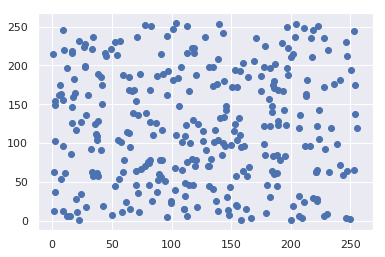

In [7]:
plt.scatter(background_stars[:,0], background_stars[:,1]);

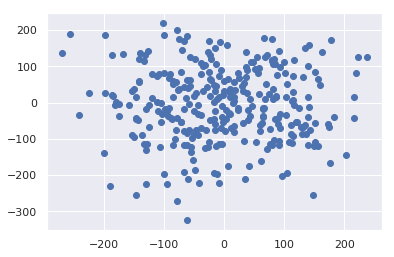

In [8]:
plt.scatter(background_stars[:,2], background_stars[:,3]);

In [9]:
mu_ufdg = np.random.uniform(0, field_size, size = 2)+5
cov_ufdg = np.array([[np.random.rand()*50+20, 0.0], [0.0, np.random.rand()*70+70]])
cov_ufdg[0,1] = cov_ufdg[1,0] = np.prod(np.sqrt(np.diag(cov_ufdg)))*(np.random.rand()*-0.5)
n_stars_ufdg = int(np.random.randn()*5)+100
ufdg_stars_pos = np.random.multivariate_normal(mu_ufdg, cov_ufdg, size = n_stars_ufdg)
mu_ufdg_vel = np.random.uniform(100, 200, size = 2)
ufdg_stars_vel = np.random.multivariate_normal(mu_ufdg_vel, np.eye(2)*50, size = n_stars_ufdg)
ufdg_stars = np.c_[ufdg_stars_pos, ufdg_stars_vel]

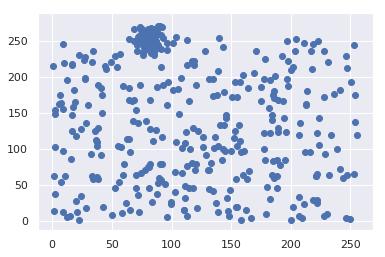

In [10]:
plt.scatter(background_stars[:,0], background_stars[:,1]);
plt.scatter(ufdg_stars[:,0], ufdg_stars[:,1], color = 'b')

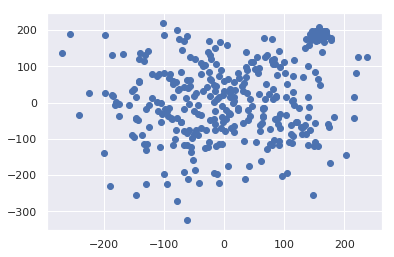

In [11]:
plt.scatter(background_stars[:,2], background_stars[:,3]);
plt.scatter(ufdg_stars[:,2], ufdg_stars[:,3], color = 'b')

In [25]:
full_field = np.vstack([background_stars, ufdg_stars])
field_image, _ = np.histogramdd(full_field,\
                            bins=(np.linspace(0, field_size, field_size/4),
                                  np.linspace(0, field_size, field_size/4), 
                                  np.linspace(-300, 300, 60),
                                  np.linspace(-300, 300, 60) ) )

In [26]:
field_image.shape, field_image.nbytes/(1024**2)

((63, 63, 59, 59), 105)

In [34]:
def plot(im):
    plt.subplot(121)
    plt.imshow(im.sum(axis = (2,3)))
    plt.subplot(122)
    plt.imshow(im.sum(axis = (0,1)))
    plt.show()

In [32]:
def filter_layer(im, l = [1.0, 2.0, 5.0, 10.0]):
    " return im filtered by the l filters"
    
    return np.stack([ndimage.filters.gaussian_filter(im, l) for l in l])

(4, 63, 63, 59, 59)


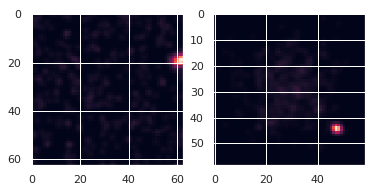

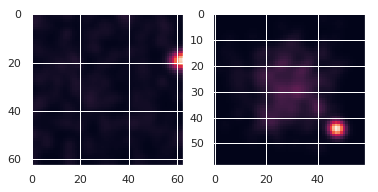

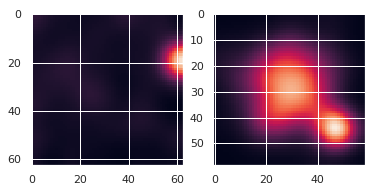

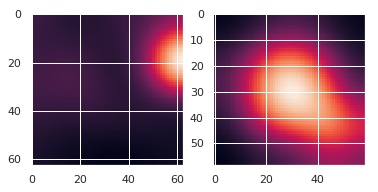

In [36]:
filtered_ims = filter_layer(field_image)
print filtered_ims.shape
for im in filtered_ims:
    plot(im)

In [60]:
coeff = pywt.dwtn(filtered_ims[0], 'bior3.3')

In [63]:
filtered_ims[0].shape

(63, 63, 59, 59)

In [61]:
coeff['aaaa'].shape

(35, 35, 33, 33)

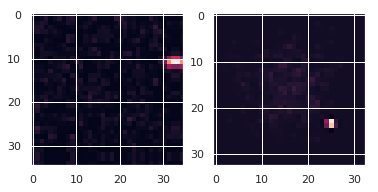

In [62]:
plot(coeff['aaaa'])

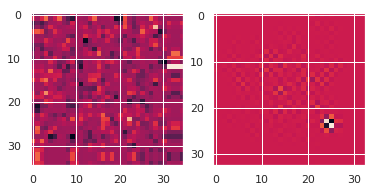

In [54]:
plot(coeff['aadd'])

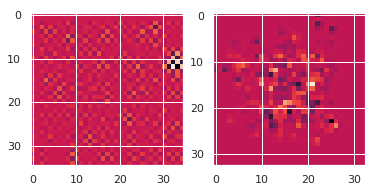

In [55]:
plot(coeff['ddaa'])

In [161]:
def wavelet_layer(im, wavlets = ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']):
    all_outputs = []
    for wv in wavlets:
        LL, (LH, HL, HH) = pywt.dwt2(im, wv)
        all_outputs.append(np.stack([LL, LH, HL, HH]))
    return all_outputs

In [162]:
all_outputs = wavelet_layer(filtered_ims)

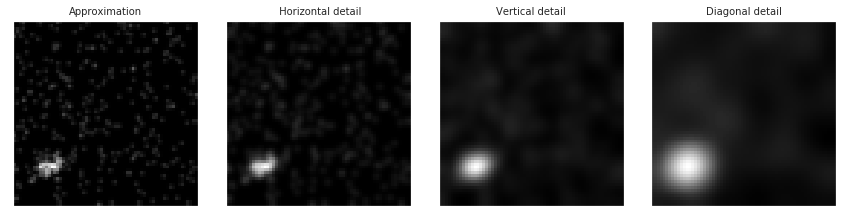

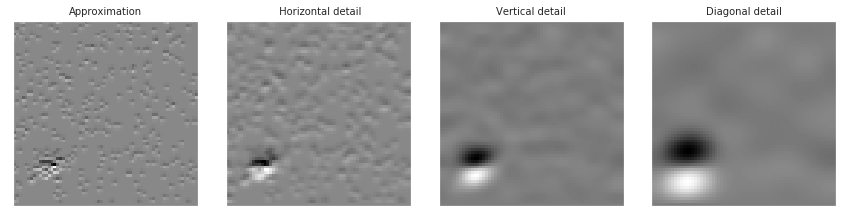

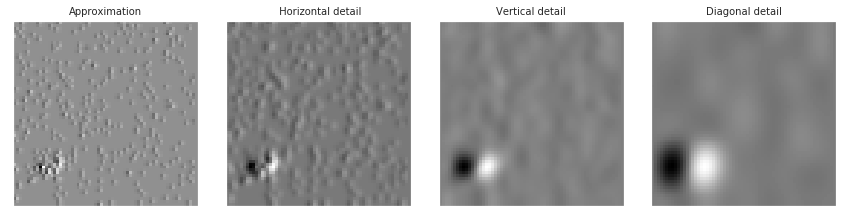

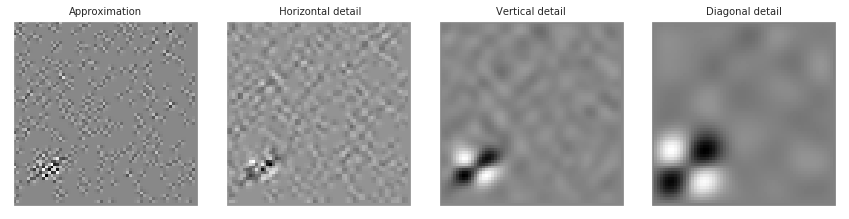

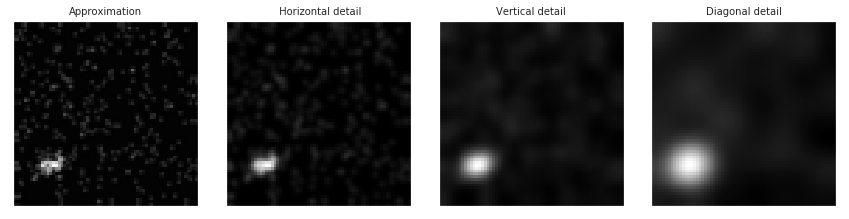

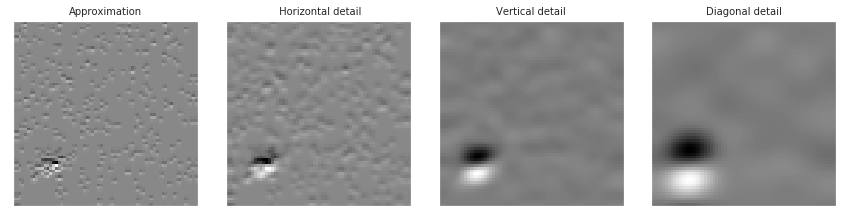

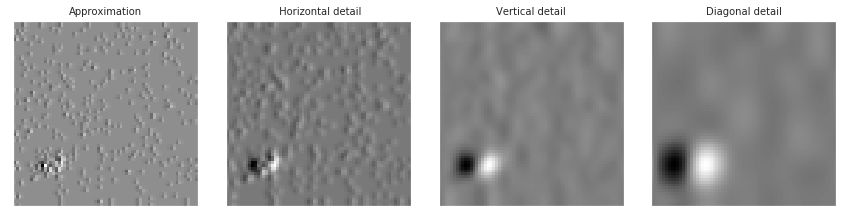

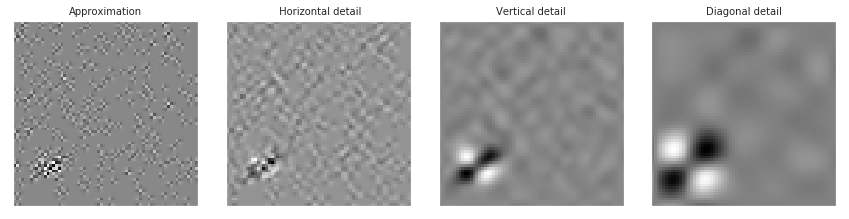

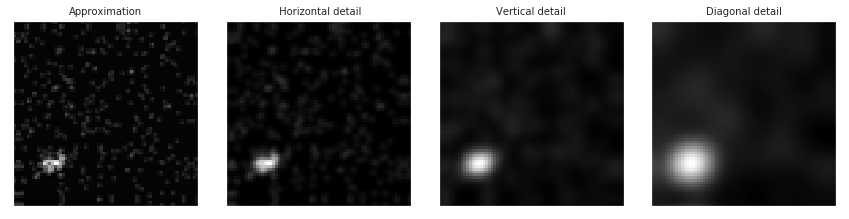

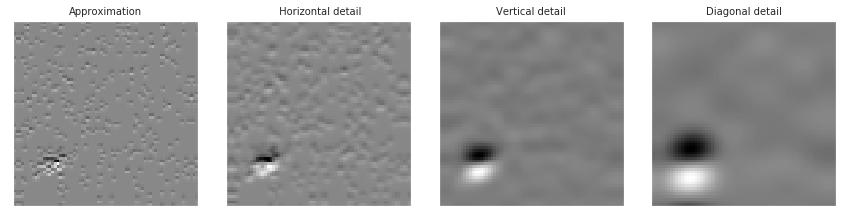

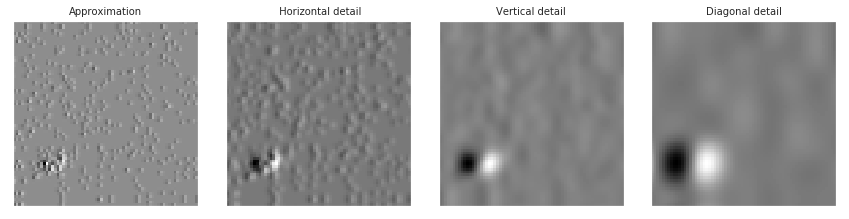

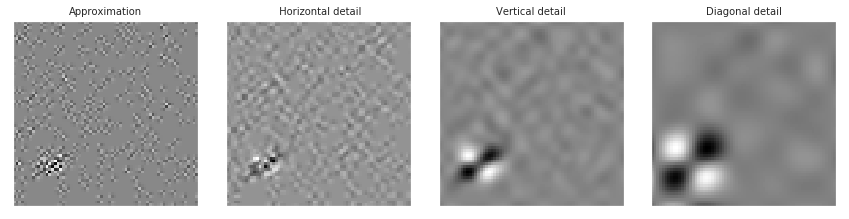

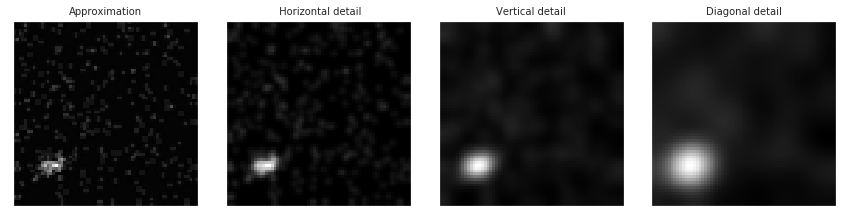

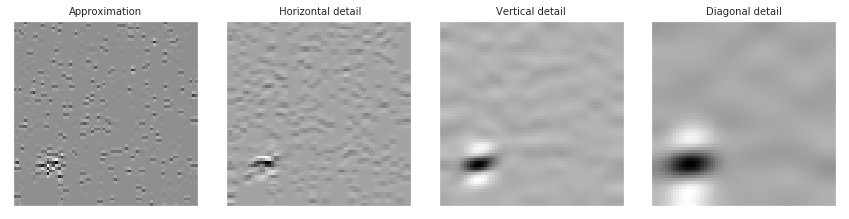

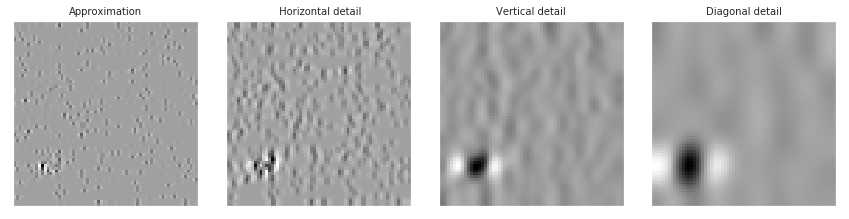

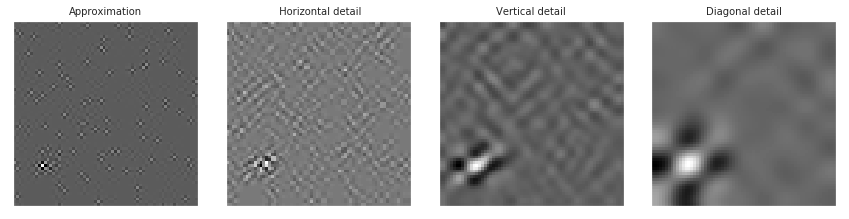

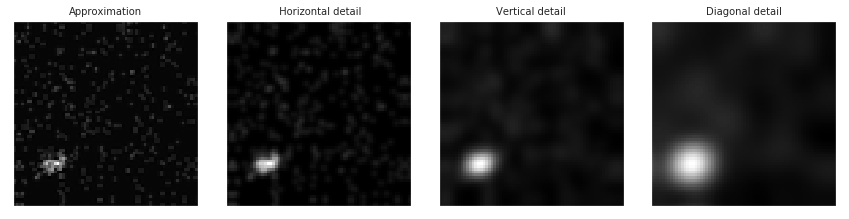

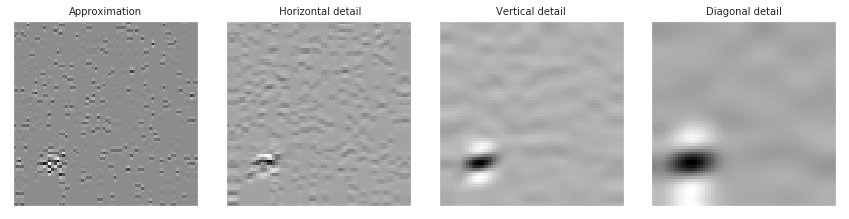

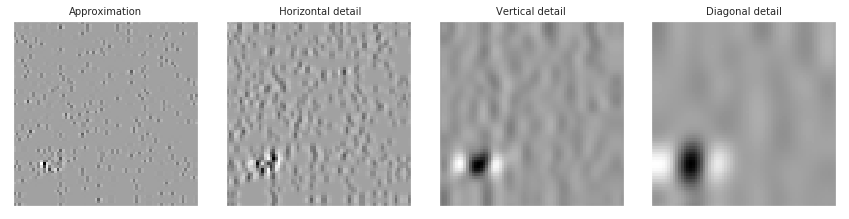

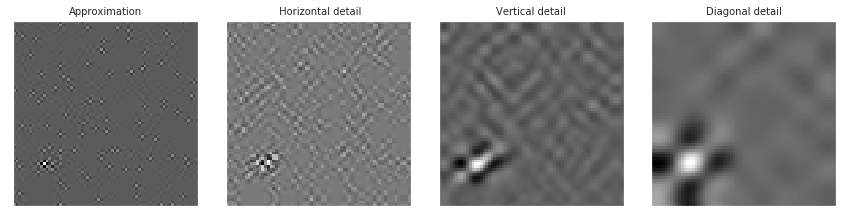

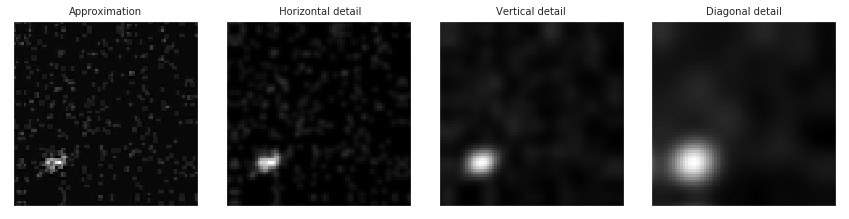

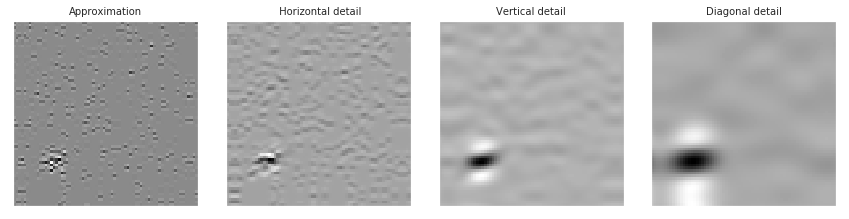

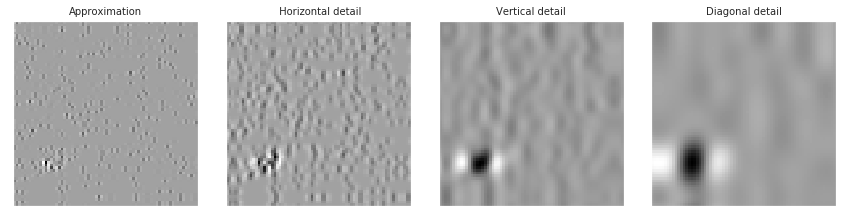

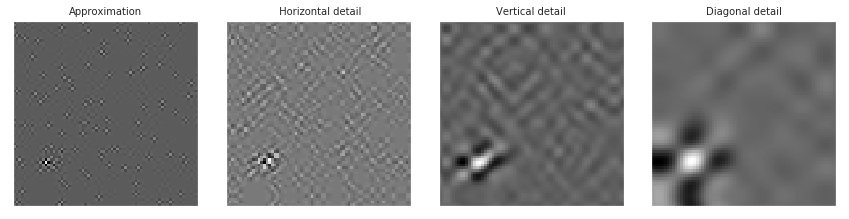

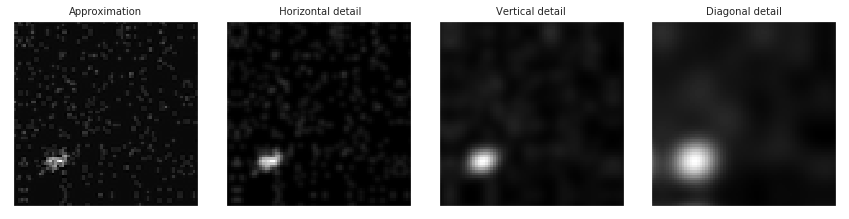

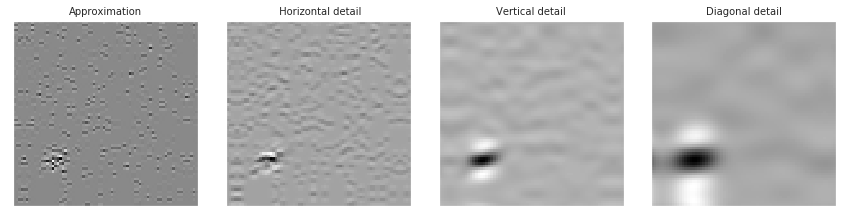

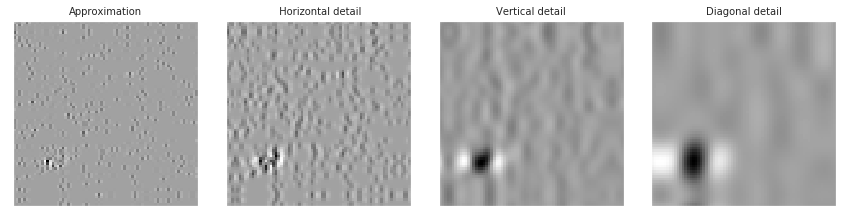

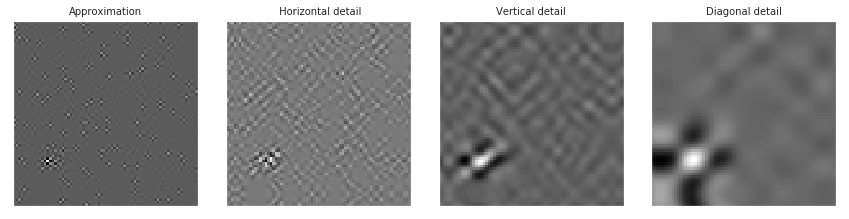

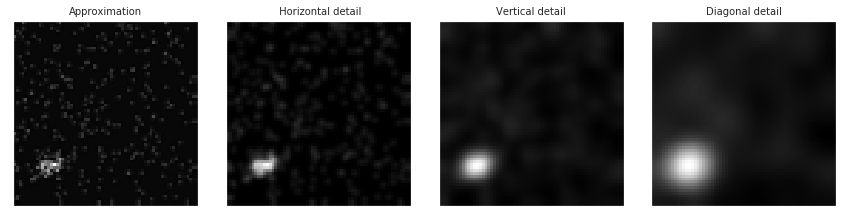

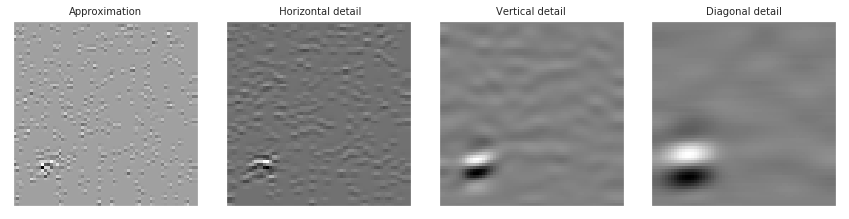

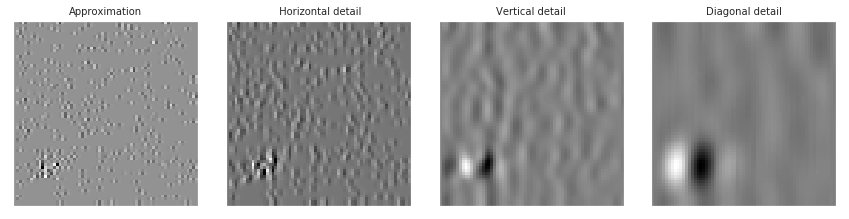

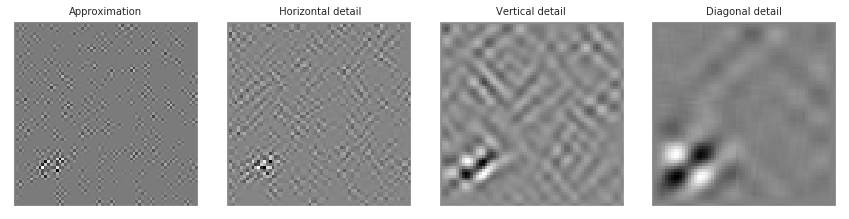

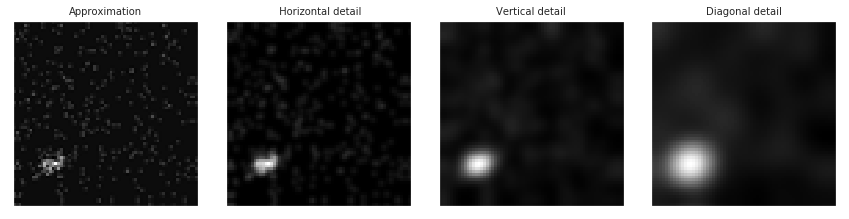

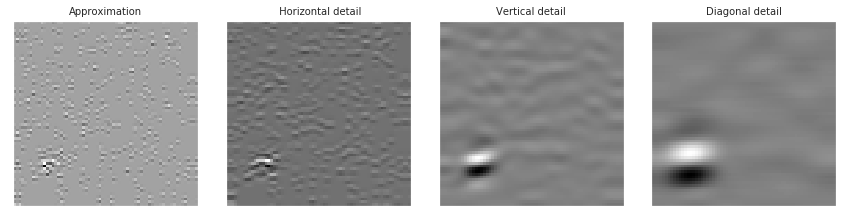

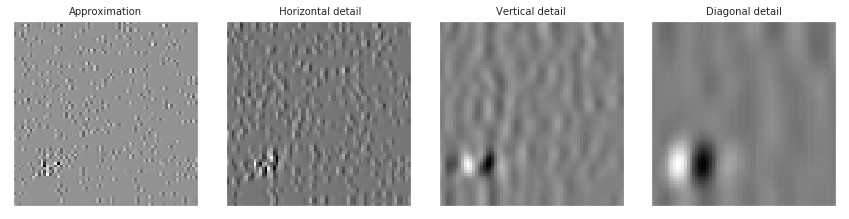

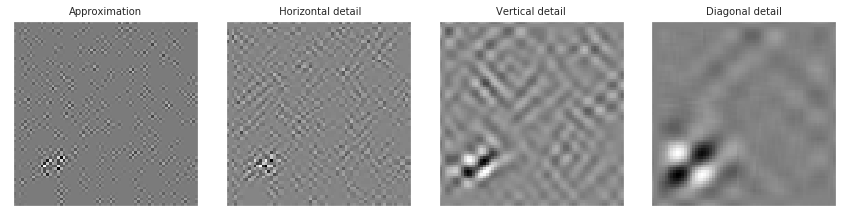

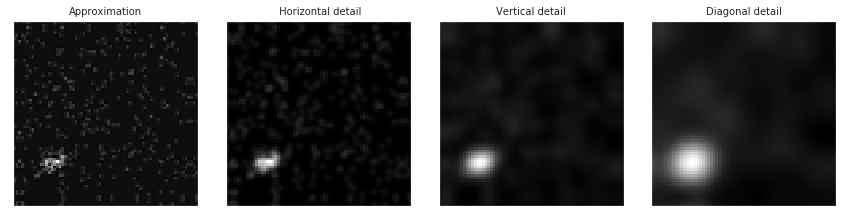

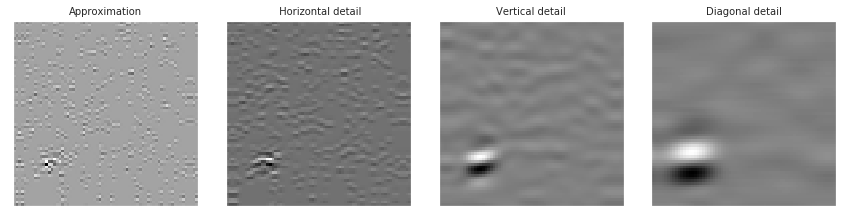

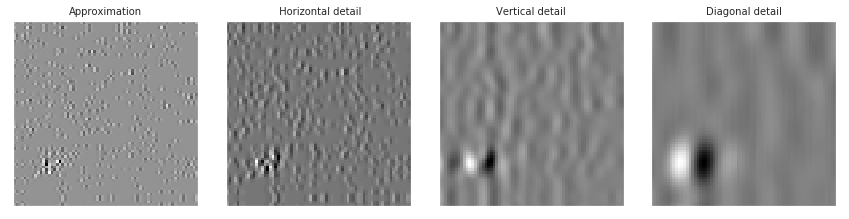

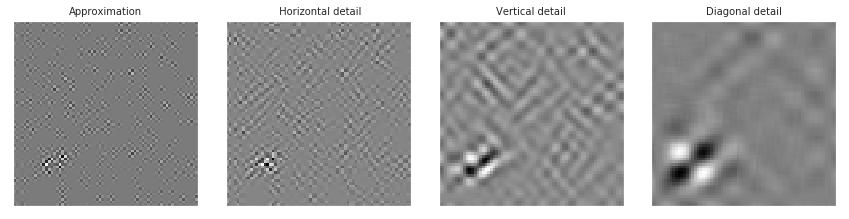

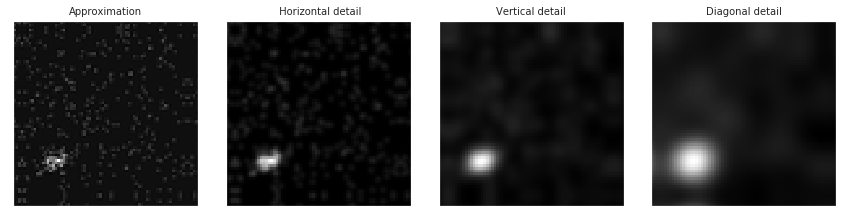

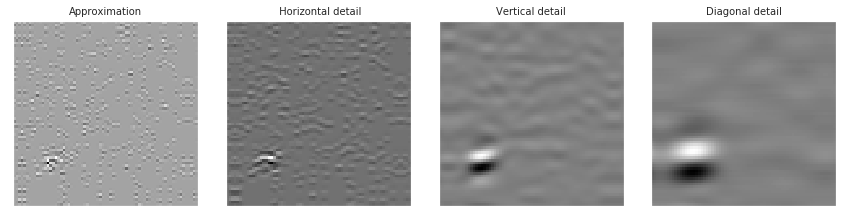

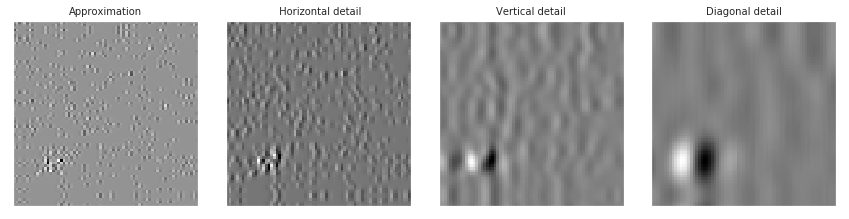

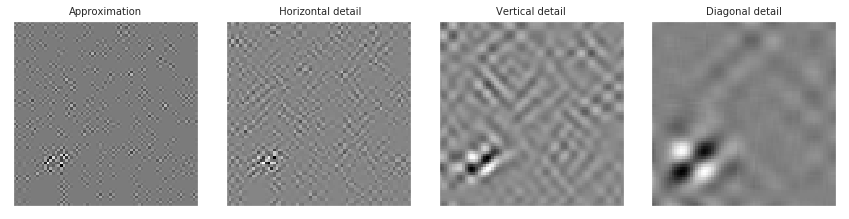

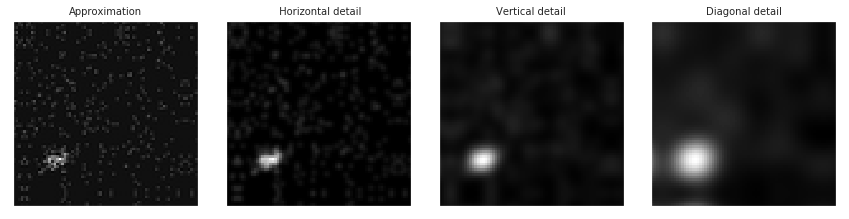

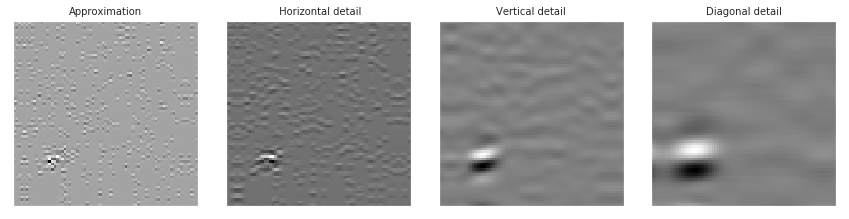

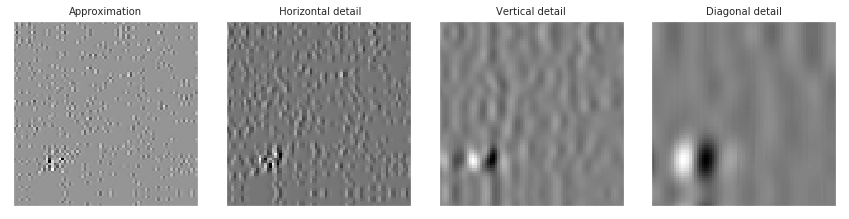

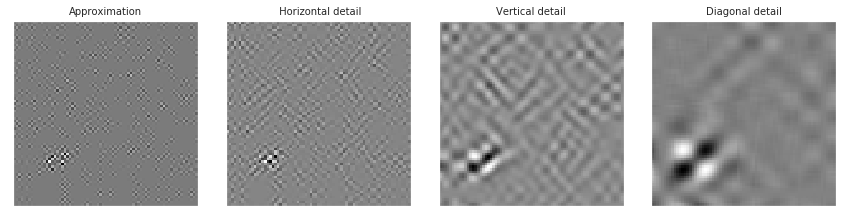

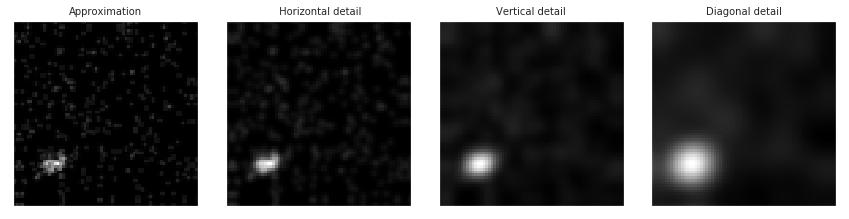

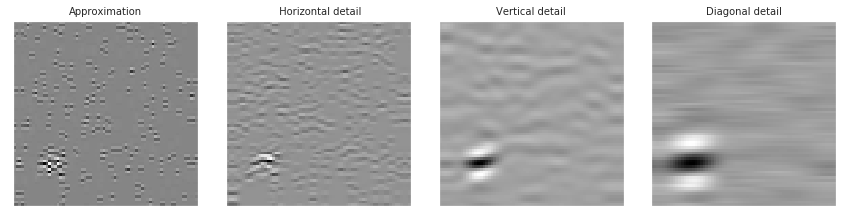

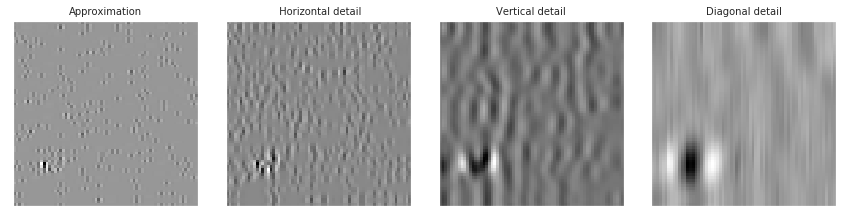

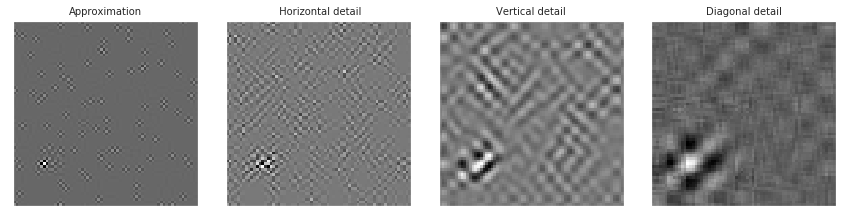

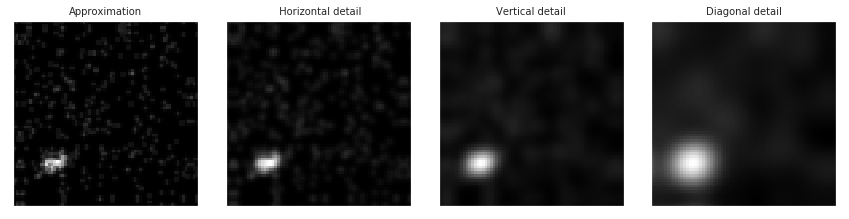

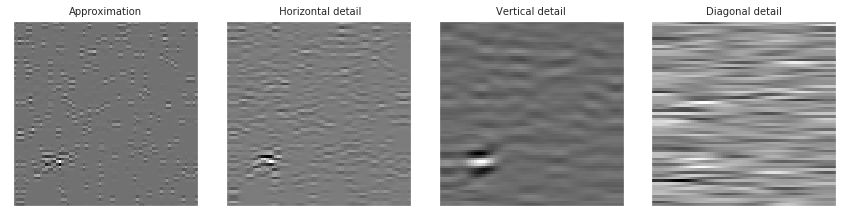

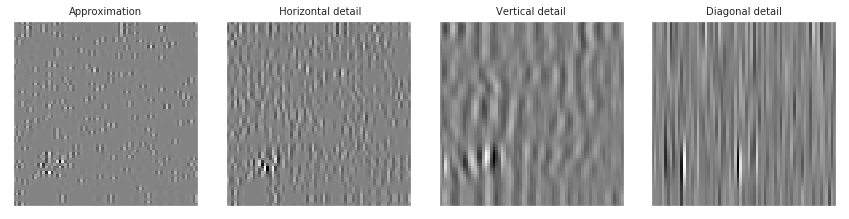

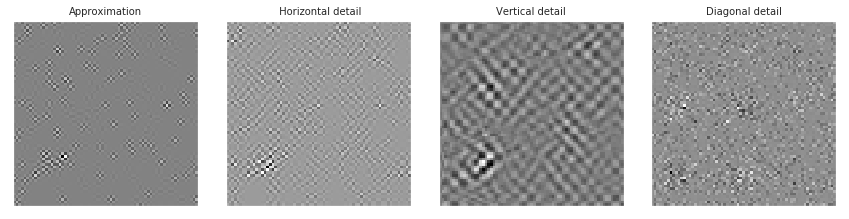

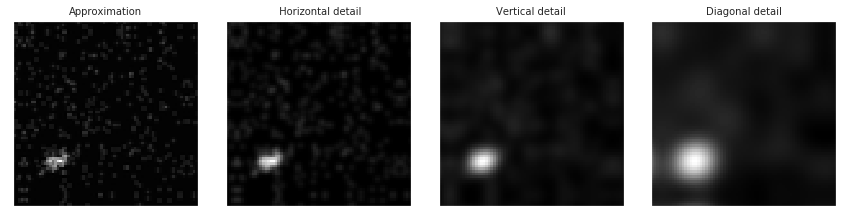

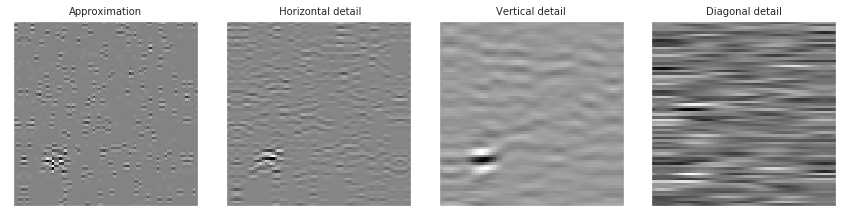

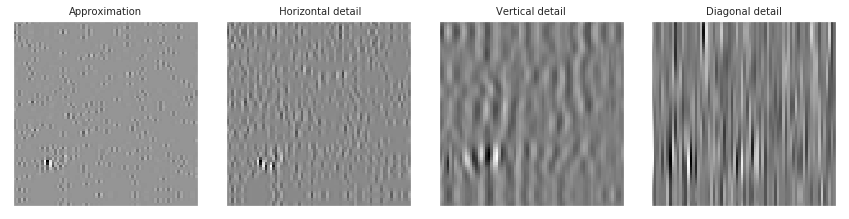

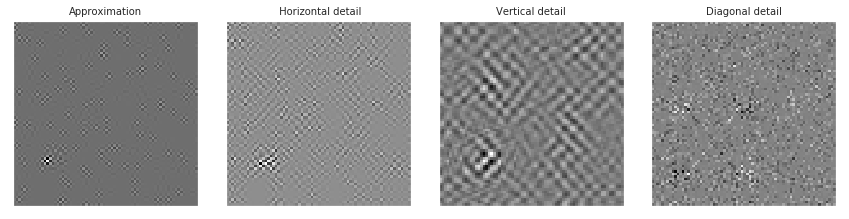

In [163]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
              'Vertical detail', 'Diagonal detail']
for o in all_outputs:
    for g in o:
        LL, LH, HL, HH = g

        fig = plt.figure(figsize=(12, 3))
        for i, a in enumerate([LL, LH, HL, HH]):
            ax = fig.add_subplot(1, 4, i + 1)
            ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
            ax.set_title(titles[i], fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])

        fig.tight_layout()
        plt.show()

In [165]:
max_pos = ndimage.measurements.maximum_position(LL)

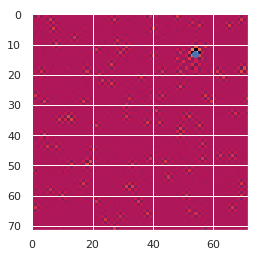

In [166]:
plt.scatter(max_pos[0], max_pos[1])
plt.imshow(LL.T)

In [167]:
max_pos

(54, 13)

In [168]:
mu_ufdg

array([ 203.27371004,   50.40233864])